# **QSAR Model Building of HER2 Inhibitors**

# Read in data

In [4]:
!pip install pandas

In [5]:
import pandas as pd

In [6]:
#Pre-processed data:
dataset_url = 'https://raw.githubusercontent.com/PascalSpiegler/bioactivities/main/HER2_bioactivity_data_3class_pIC50_pubchem_FINAL.csv'
dataset = pd.read_csv(dataset_url, sep=',')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.225687
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.177799
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.415669
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.207608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.929962
2906,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.777544
2907,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.800001
2908,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.771600


In [7]:
#Removing pIC50 from the table so we are left with our X variables:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2906,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2907,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2908,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Setting the Y values as our pIC50 column:
Y = dataset.iloc[:,-1]
Y

0       5.225687
1       4.177799
2       5.000000
3       5.415669
4       6.207608
          ...   
2905    4.929962
2906    5.777544
2907    5.800001
2908    5.771600
2909    6.000000
Name: pIC50, Length: 2910, dtype: float64

# Removing low variance features

In [9]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP13,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,...,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP813,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP826,PubchemFP827
0,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,1,0,0,0,1,1,0,0,0,0,...,0,1,1,1,0,0,1,1,0,0
2906,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2908,1,0,0,1,1,0,1,0,0,1,...,0,0,1,1,1,0,1,0,1,0


In [10]:
X.to_csv('descriptor_list.csv', index = False)

# Random Forest Regression Model

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model = RandomForestRegressor(n_estimators=300, max_depth = 15, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto', random_state = 42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.7103098347987782

## Model Prediction

In [13]:
Y_pred = model.predict(X)
Y_pred

array([5.47568744, 4.90996503, 5.36539212, ..., 5.41045153, 5.65883598,
       6.17932436])

## Model Performance

In [14]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.34
Coefficient of determination (R^2): 0.71


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

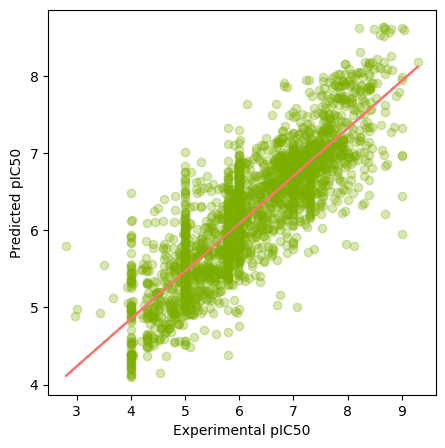

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [17]:
import pickle

In [18]:
pickle.dump(model, open('HER2.pkl', 'wb'))